In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [78]:
train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
display(train,test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [79]:
pd.options.display.max_columns = 100

In [80]:
# 아웃라이어 제거
train = train.drop(train[(train["SalePrice"] < 200000) & (train["GrLivArea"] > 4000)].index, axis=0)

In [81]:
all_data = pd.concat([train,test])

In [82]:
# 아웃라이어 제거하고 인덱스 맞춰줌
all_data = all_data.reset_index(drop=True)

In [83]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2913,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2914,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2915,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [84]:
# y값에 대한 코릴레이션 찍어보기 (y = "SalePrice")
train.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePr

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

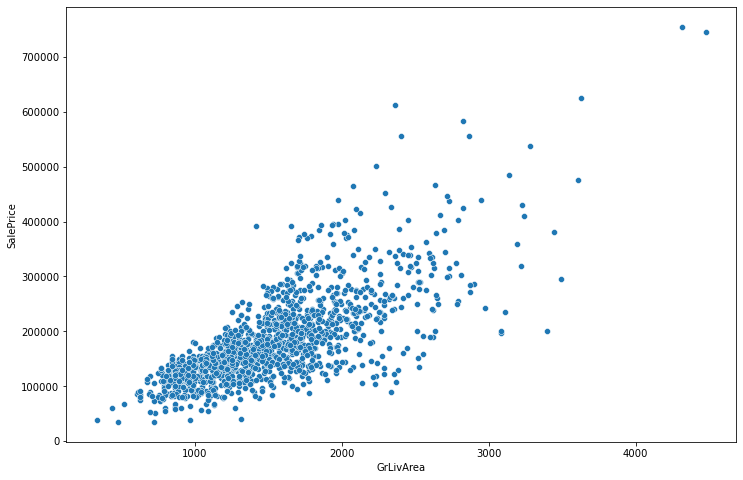

In [85]:
# (코릴레이션 높은 칼럼 하나 골라서)그래프 그려보기 -> 아웃라이어 확인
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(all_data["GrLivArea"], all_data["SalePrice"])

In [86]:
# all_data.info()

In [87]:
# 교호작용(+새로운 칼럼 생성)
all_data["Old"] = all_data["YrSold"]- all_data["YearBuilt"]
all_data["OverallPlus"] = all_data["OverallQual"] + all_data["OverallCond"]
all_data["OverallMinus"] = all_data["OverallQual"] - all_data["OverallCond"]
all_data["TotalArea"]=all_data["GrLivArea"] + all_data["TotalBsmtSF"]
all_data["FinalArea"]=all_data["TotalArea"] + all_data["GarageArea"]
all_data["Area"] = all_data["FinalArea"] + all_data["LotArea"]

In [88]:
# 라벨인코딩 하는 건데, 선형모델 돌릴거라 안씀
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# cate_cols = all_data.columns[all_data.dtypes == "object"]

# for i in cate_cols:
#     all_data[i] = le.fit_transform(list(all_data[i]))

In [89]:
# 모델 학습시키는데 필요없는 칼럼 제거(id, target변수(y값))
all_data2 = all_data.drop(["Id","SalePrice"],1)

In [90]:
all_data2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Old,OverallPlus,OverallMinus,TotalArea,FinalArea,Area
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5,12,2,2566.0,3114.0,11564.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31,14,-2,2524.0,2984.0,12584.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7,12,2,2706.0,3314.0,14564.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91,12,2,2473.0,3115.0,12665.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8,13,3,3343.0,4179.0,18439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,36,11,-3,1638.0,1638.0,3574.0
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,36,9,-1,1638.0,1924.0,3818.0
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,

In [91]:
# 원핫인코딩 (라벨인코딩 안하는 대신)
all_data3 = pd.get_dummies(all_data2)

In [92]:
# 결측값 처리
all_data3 = all_data3.fillna(-1)

In [93]:
all_data3

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Old,OverallPlus,OverallMinus,TotalArea,FinalArea,Area,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,5,12,2,2566.0,3114.0,11564.0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,31,14,-2,2524.0,2984.0,12584.0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,7,12,2,2706.0,3314.0,14564.0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,91,12,2,2473.0,3115.0,12665.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,8,13,3,3343.0,4179.0,18439.0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,-1.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,36,11,-3,1638.0,1638.0,3574.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2913,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,36,9,-1,1638.0,1924.0,3818.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2914,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,46,12,-2,2448.0,3024.0,23024.0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2915,85,62.0,10441,5,5

In [94]:
# 스탠다드 스케일링
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# all_data4 = ss.fit_transform(all_data3)
# all_data4 = pd.DataFrame(all_data4, columns=all_data3.columns)

In [95]:
# 로버스트 스케일링(이상치를 잘 잡아줌)
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
all_data4 = rs.fit_transform(all_data3)
all_data4 = pd.DataFrame(all_data4, columns=all_data3.columns)

In [96]:
train2 = all_data4[:len(train)]
test2 = all_data4[len(train):]

In [97]:
# 교차검증(k-fold) 간단히
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
for i in [1, 10, 13, 15, 17, 20, 50,100, 200, 300, 500, 700, 1000]:
    rg = Ridge(alpha=i)
    print(i)
    print(np.sqrt(-cross_val_score(rg, train2, train["SalePrice"], n_jobs=4, cv=10, scoring='neg_mean_squared_error', ).mean()))

1
25044.707456161126
10
24149.393770105315
13
24135.170303260078
15
24138.512996361387
17
24148.285330612413
20
24170.99254850217
50
24540.15745609059
100
25147.371574974874
200
26122.30512889262
300
26909.593268620916
500
28195.425360768313
700
29268.380580615576
1000
30660.37044827614


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

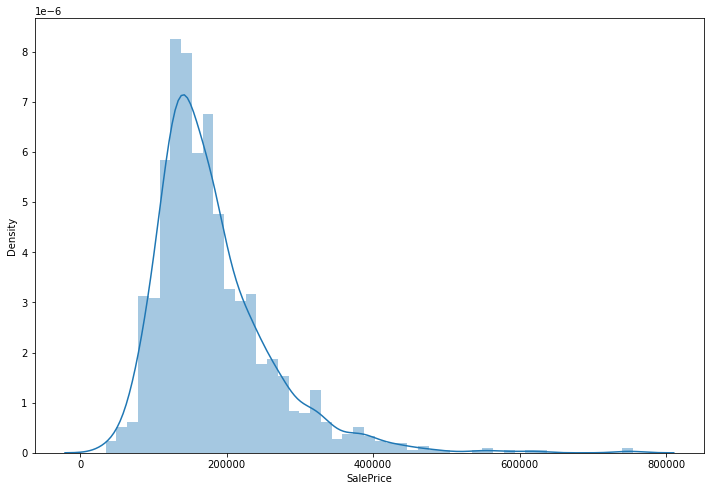

In [98]:
# target값 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
sns.distplot(all_data["SalePrice"])

In [99]:
# ridge모델(선형) 학습 & 예측
from sklearn.linear_model import Ridge
rg = Ridge(alpha=15)
rg.fit(train2, np.log(train["SalePrice"]))  #로그 트렌스포메이션
result = rg.predict(test2)

In [100]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_jobs=4)

# rf.fit(train2, train["SalePrice"])
# result = rf.predict(test2)

In [101]:
sub = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
sub["SalePrice"] = np.exp(result) #로그 트렌스포메이션
sub.to_csv("submission_ridge.csv",index=0)

In [102]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(iterations=4000,) #default 1000
cb.fit(train2, np.log(train["SalePrice"]))
result2 = cb.predict(test2)

Learning rate set to 0.014554
0:	learn: 0.3954510	total: 63.4ms	remaining: 4m 13s
1:	learn: 0.3917842	total: 72.7ms	remaining: 2m 25s
2:	learn: 0.3878576	total: 80.9ms	remaining: 1m 47s
3:	learn: 0.3840908	total: 88.6ms	remaining: 1m 28s
4:	learn: 0.3803233	total: 95.8ms	remaining: 1m 16s
5:	learn: 0.3766793	total: 111ms	remaining: 1m 13s
6:	learn: 0.3730214	total: 122ms	remaining: 1m 9s
7:	learn: 0.3697425	total: 130ms	remaining: 1m 4s
8:	learn: 0.3661209	total: 139ms	remaining: 1m 1s
9:	learn: 0.3625220	total: 151ms	remaining: 1m
10:	learn: 0.3590767	total: 159ms	remaining: 57.7s
11:	learn: 0.3560230	total: 167ms	remaining: 55.5s
12:	learn: 0.3525718	total: 174ms	remaining: 53.5s
13:	learn: 0.3491587	total: 184ms	remaining: 52.5s
14:	learn: 0.3459185	total: 192ms	remaining: 51s
15:	learn: 0.3425864	total: 199ms	remaining: 49.5s
16:	learn: 0.3392190	total: 205ms	remaining: 48.1s
17:	learn: 0.3361764	total: 211ms	remaining: 46.7s
18:	learn: 0.3332019	total: 218ms	remaining: 45.6s
19:	l

173:	learn: 0.1376620	total: 1.18s	remaining: 26s
174:	learn: 0.1372967	total: 1.19s	remaining: 26s
175:	learn: 0.1369743	total: 1.19s	remaining: 25.9s
176:	learn: 0.1365259	total: 1.2s	remaining: 25.9s
177:	learn: 0.1361734	total: 1.2s	remaining: 25.9s
178:	learn: 0.1358315	total: 1.21s	remaining: 25.8s
179:	learn: 0.1354478	total: 1.22s	remaining: 25.8s
180:	learn: 0.1351229	total: 1.22s	remaining: 25.8s
181:	learn: 0.1347394	total: 1.23s	remaining: 25.8s
182:	learn: 0.1344466	total: 1.23s	remaining: 25.7s
183:	learn: 0.1340897	total: 1.24s	remaining: 25.7s
184:	learn: 0.1337841	total: 1.25s	remaining: 25.7s
185:	learn: 0.1334890	total: 1.25s	remaining: 25.7s
186:	learn: 0.1331774	total: 1.26s	remaining: 25.7s
187:	learn: 0.1328339	total: 1.26s	remaining: 25.7s
188:	learn: 0.1324771	total: 1.27s	remaining: 25.6s
189:	learn: 0.1321423	total: 1.28s	remaining: 25.6s
190:	learn: 0.1318365	total: 1.28s	remaining: 25.6s
191:	learn: 0.1315337	total: 1.29s	remaining: 25.5s
192:	learn: 0.1312

339:	learn: 0.1061956	total: 2.17s	remaining: 23.4s
340:	learn: 0.1060858	total: 2.18s	remaining: 23.4s
341:	learn: 0.1059870	total: 2.19s	remaining: 23.4s
342:	learn: 0.1058747	total: 2.19s	remaining: 23.4s
343:	learn: 0.1058120	total: 2.2s	remaining: 23.4s
344:	learn: 0.1057344	total: 2.2s	remaining: 23.3s
345:	learn: 0.1056120	total: 2.21s	remaining: 23.3s
346:	learn: 0.1054983	total: 2.21s	remaining: 23.3s
347:	learn: 0.1054019	total: 2.22s	remaining: 23.3s
348:	learn: 0.1053139	total: 2.23s	remaining: 23.3s
349:	learn: 0.1052357	total: 2.23s	remaining: 23.3s
350:	learn: 0.1051386	total: 2.24s	remaining: 23.3s
351:	learn: 0.1050381	total: 2.24s	remaining: 23.2s
352:	learn: 0.1049438	total: 2.25s	remaining: 23.2s
353:	learn: 0.1048568	total: 2.25s	remaining: 23.2s
354:	learn: 0.1047583	total: 2.26s	remaining: 23.2s
355:	learn: 0.1047000	total: 2.27s	remaining: 23.2s
356:	learn: 0.1045924	total: 2.27s	remaining: 23.2s
357:	learn: 0.1045367	total: 2.28s	remaining: 23.2s
358:	learn: 0.

503:	learn: 0.0940830	total: 3.16s	remaining: 21.9s
504:	learn: 0.0940124	total: 3.17s	remaining: 21.9s
505:	learn: 0.0939496	total: 3.17s	remaining: 21.9s
506:	learn: 0.0938802	total: 3.18s	remaining: 21.9s
507:	learn: 0.0938235	total: 3.19s	remaining: 21.9s
508:	learn: 0.0937587	total: 3.19s	remaining: 21.9s
509:	learn: 0.0937107	total: 3.2s	remaining: 21.9s
510:	learn: 0.0936546	total: 3.2s	remaining: 21.9s
511:	learn: 0.0935980	total: 3.21s	remaining: 21.9s
512:	learn: 0.0935460	total: 3.21s	remaining: 21.9s
513:	learn: 0.0935007	total: 3.22s	remaining: 21.8s
514:	learn: 0.0934578	total: 3.23s	remaining: 21.8s
515:	learn: 0.0934014	total: 3.23s	remaining: 21.8s
516:	learn: 0.0933397	total: 3.24s	remaining: 21.8s
517:	learn: 0.0932927	total: 3.25s	remaining: 21.8s
518:	learn: 0.0932315	total: 3.25s	remaining: 21.8s
519:	learn: 0.0931869	total: 3.26s	remaining: 21.8s
520:	learn: 0.0931302	total: 3.27s	remaining: 21.8s
521:	learn: 0.0930559	total: 3.27s	remaining: 21.8s
522:	learn: 0.

671:	learn: 0.0855586	total: 4.17s	remaining: 20.6s
672:	learn: 0.0855426	total: 4.17s	remaining: 20.6s
673:	learn: 0.0855033	total: 4.18s	remaining: 20.6s
674:	learn: 0.0854708	total: 4.18s	remaining: 20.6s
675:	learn: 0.0854298	total: 4.19s	remaining: 20.6s
676:	learn: 0.0853752	total: 4.19s	remaining: 20.6s
677:	learn: 0.0853202	total: 4.2s	remaining: 20.6s
678:	learn: 0.0852950	total: 4.21s	remaining: 20.6s
679:	learn: 0.0852507	total: 4.21s	remaining: 20.6s
680:	learn: 0.0851926	total: 4.22s	remaining: 20.6s
681:	learn: 0.0851550	total: 4.23s	remaining: 20.6s
682:	learn: 0.0851389	total: 4.23s	remaining: 20.6s
683:	learn: 0.0851232	total: 4.24s	remaining: 20.6s
684:	learn: 0.0850796	total: 4.25s	remaining: 20.5s
685:	learn: 0.0850117	total: 4.25s	remaining: 20.5s
686:	learn: 0.0849972	total: 4.26s	remaining: 20.5s
687:	learn: 0.0849400	total: 4.26s	remaining: 20.5s
688:	learn: 0.0849072	total: 4.27s	remaining: 20.5s
689:	learn: 0.0848656	total: 4.28s	remaining: 20.5s
690:	learn: 0

839:	learn: 0.0794293	total: 5.16s	remaining: 19.4s
840:	learn: 0.0793880	total: 5.17s	remaining: 19.4s
841:	learn: 0.0793802	total: 5.17s	remaining: 19.4s
842:	learn: 0.0793414	total: 5.18s	remaining: 19.4s
843:	learn: 0.0793313	total: 5.18s	remaining: 19.4s
844:	learn: 0.0792840	total: 5.19s	remaining: 19.4s
845:	learn: 0.0792401	total: 5.2s	remaining: 19.4s
846:	learn: 0.0791959	total: 5.2s	remaining: 19.4s
847:	learn: 0.0791888	total: 5.21s	remaining: 19.4s
848:	learn: 0.0791727	total: 5.21s	remaining: 19.4s
849:	learn: 0.0791292	total: 5.22s	remaining: 19.4s
850:	learn: 0.0791217	total: 5.23s	remaining: 19.3s
851:	learn: 0.0790809	total: 5.23s	remaining: 19.3s
852:	learn: 0.0790388	total: 5.24s	remaining: 19.3s
853:	learn: 0.0789751	total: 5.24s	remaining: 19.3s
854:	learn: 0.0789398	total: 5.25s	remaining: 19.3s
855:	learn: 0.0789320	total: 5.25s	remaining: 19.3s
856:	learn: 0.0789260	total: 5.26s	remaining: 19.3s
857:	learn: 0.0788829	total: 5.27s	remaining: 19.3s
858:	learn: 0.

1006:	learn: 0.0737661	total: 6.15s	remaining: 18.3s
1007:	learn: 0.0737377	total: 6.16s	remaining: 18.3s
1008:	learn: 0.0737144	total: 6.16s	remaining: 18.3s
1009:	learn: 0.0736836	total: 6.17s	remaining: 18.3s
1010:	learn: 0.0736460	total: 6.17s	remaining: 18.3s
1011:	learn: 0.0736131	total: 6.18s	remaining: 18.3s
1012:	learn: 0.0735881	total: 6.19s	remaining: 18.2s
1013:	learn: 0.0735567	total: 6.19s	remaining: 18.2s
1014:	learn: 0.0735375	total: 6.2s	remaining: 18.2s
1015:	learn: 0.0734941	total: 6.2s	remaining: 18.2s
1016:	learn: 0.0734708	total: 6.21s	remaining: 18.2s
1017:	learn: 0.0734456	total: 6.21s	remaining: 18.2s
1018:	learn: 0.0733883	total: 6.22s	remaining: 18.2s
1019:	learn: 0.0733384	total: 6.22s	remaining: 18.2s
1020:	learn: 0.0733176	total: 6.23s	remaining: 18.2s
1021:	learn: 0.0732852	total: 6.24s	remaining: 18.2s
1022:	learn: 0.0732493	total: 6.24s	remaining: 18.2s
1023:	learn: 0.0732181	total: 6.25s	remaining: 18.2s
1024:	learn: 0.0731959	total: 6.25s	remaining: 1

1169:	learn: 0.0696335	total: 7.35s	remaining: 17.8s
1170:	learn: 0.0695925	total: 7.36s	remaining: 17.8s
1171:	learn: 0.0695649	total: 7.37s	remaining: 17.8s
1172:	learn: 0.0695321	total: 7.38s	remaining: 17.8s
1173:	learn: 0.0695282	total: 7.39s	remaining: 17.8s
1174:	learn: 0.0694901	total: 7.4s	remaining: 17.8s
1175:	learn: 0.0694561	total: 7.41s	remaining: 17.8s
1176:	learn: 0.0694394	total: 7.41s	remaining: 17.8s
1177:	learn: 0.0694125	total: 7.42s	remaining: 17.8s
1178:	learn: 0.0693883	total: 7.43s	remaining: 17.8s
1179:	learn: 0.0693852	total: 7.44s	remaining: 17.8s
1180:	learn: 0.0693582	total: 7.44s	remaining: 17.8s
1181:	learn: 0.0693550	total: 7.45s	remaining: 17.8s
1182:	learn: 0.0693442	total: 7.45s	remaining: 17.7s
1183:	learn: 0.0693251	total: 7.46s	remaining: 17.7s
1184:	learn: 0.0692928	total: 7.46s	remaining: 17.7s
1185:	learn: 0.0692703	total: 7.47s	remaining: 17.7s
1186:	learn: 0.0692670	total: 7.48s	remaining: 17.7s
1187:	learn: 0.0692635	total: 7.48s	remaining: 

1325:	learn: 0.0661043	total: 8.34s	remaining: 16.8s
1326:	learn: 0.0660707	total: 8.35s	remaining: 16.8s
1327:	learn: 0.0660400	total: 8.35s	remaining: 16.8s
1328:	learn: 0.0660001	total: 8.36s	remaining: 16.8s
1329:	learn: 0.0659618	total: 8.37s	remaining: 16.8s
1330:	learn: 0.0659531	total: 8.37s	remaining: 16.8s
1331:	learn: 0.0659263	total: 8.38s	remaining: 16.8s
1332:	learn: 0.0658993	total: 8.38s	remaining: 16.8s
1333:	learn: 0.0658623	total: 8.39s	remaining: 16.8s
1334:	learn: 0.0658594	total: 8.4s	remaining: 16.8s
1335:	learn: 0.0658563	total: 8.4s	remaining: 16.8s
1336:	learn: 0.0658320	total: 8.41s	remaining: 16.7s
1337:	learn: 0.0658019	total: 8.41s	remaining: 16.7s
1338:	learn: 0.0657834	total: 8.42s	remaining: 16.7s
1339:	learn: 0.0657525	total: 8.43s	remaining: 16.7s
1340:	learn: 0.0657221	total: 8.43s	remaining: 16.7s
1341:	learn: 0.0657035	total: 8.44s	remaining: 16.7s
1342:	learn: 0.0656695	total: 8.44s	remaining: 16.7s
1343:	learn: 0.0656406	total: 8.45s	remaining: 1

1492:	learn: 0.0617413	total: 9.34s	remaining: 15.7s
1493:	learn: 0.0617211	total: 9.35s	remaining: 15.7s
1494:	learn: 0.0616918	total: 9.35s	remaining: 15.7s
1495:	learn: 0.0616657	total: 9.36s	remaining: 15.7s
1496:	learn: 0.0616636	total: 9.36s	remaining: 15.7s
1497:	learn: 0.0616299	total: 9.37s	remaining: 15.6s
1498:	learn: 0.0616101	total: 9.37s	remaining: 15.6s
1499:	learn: 0.0615682	total: 9.38s	remaining: 15.6s
1500:	learn: 0.0615509	total: 9.39s	remaining: 15.6s
1501:	learn: 0.0615349	total: 9.39s	remaining: 15.6s
1502:	learn: 0.0615246	total: 9.4s	remaining: 15.6s
1503:	learn: 0.0615224	total: 9.4s	remaining: 15.6s
1504:	learn: 0.0614920	total: 9.41s	remaining: 15.6s
1505:	learn: 0.0614609	total: 9.41s	remaining: 15.6s
1506:	learn: 0.0614395	total: 9.42s	remaining: 15.6s
1507:	learn: 0.0614115	total: 9.43s	remaining: 15.6s
1508:	learn: 0.0613869	total: 9.43s	remaining: 15.6s
1509:	learn: 0.0613640	total: 9.44s	remaining: 15.6s
1510:	learn: 0.0613387	total: 9.44s	remaining: 1

1652:	learn: 0.0580466	total: 10.3s	remaining: 14.7s
1653:	learn: 0.0580294	total: 10.3s	remaining: 14.7s
1654:	learn: 0.0580262	total: 10.4s	remaining: 14.7s
1655:	learn: 0.0580028	total: 10.4s	remaining: 14.7s
1656:	learn: 0.0579999	total: 10.4s	remaining: 14.7s
1657:	learn: 0.0579788	total: 10.4s	remaining: 14.6s
1658:	learn: 0.0579313	total: 10.4s	remaining: 14.6s
1659:	learn: 0.0579218	total: 10.4s	remaining: 14.6s
1660:	learn: 0.0579012	total: 10.4s	remaining: 14.6s
1661:	learn: 0.0578797	total: 10.4s	remaining: 14.6s
1662:	learn: 0.0578540	total: 10.4s	remaining: 14.6s
1663:	learn: 0.0578360	total: 10.4s	remaining: 14.6s
1664:	learn: 0.0578153	total: 10.4s	remaining: 14.6s
1665:	learn: 0.0577862	total: 10.4s	remaining: 14.6s
1666:	learn: 0.0577593	total: 10.4s	remaining: 14.6s
1667:	learn: 0.0577249	total: 10.4s	remaining: 14.6s
1668:	learn: 0.0577025	total: 10.4s	remaining: 14.6s
1669:	learn: 0.0576673	total: 10.4s	remaining: 14.6s
1670:	learn: 0.0576344	total: 10.4s	remaining:

1841:	learn: 0.0539870	total: 11.5s	remaining: 13.5s
1842:	learn: 0.0539708	total: 11.5s	remaining: 13.5s
1843:	learn: 0.0539389	total: 11.6s	remaining: 13.5s
1844:	learn: 0.0539121	total: 11.6s	remaining: 13.5s
1845:	learn: 0.0538950	total: 11.6s	remaining: 13.5s
1846:	learn: 0.0538739	total: 11.6s	remaining: 13.5s
1847:	learn: 0.0538626	total: 11.6s	remaining: 13.5s
1848:	learn: 0.0538599	total: 11.6s	remaining: 13.5s
1849:	learn: 0.0538454	total: 11.6s	remaining: 13.5s
1850:	learn: 0.0538200	total: 11.6s	remaining: 13.5s
1851:	learn: 0.0537875	total: 11.6s	remaining: 13.5s
1852:	learn: 0.0537782	total: 11.6s	remaining: 13.4s
1853:	learn: 0.0537546	total: 11.6s	remaining: 13.4s
1854:	learn: 0.0537328	total: 11.6s	remaining: 13.4s
1855:	learn: 0.0537221	total: 11.6s	remaining: 13.4s
1856:	learn: 0.0536964	total: 11.6s	remaining: 13.4s
1857:	learn: 0.0536811	total: 11.6s	remaining: 13.4s
1858:	learn: 0.0536795	total: 11.6s	remaining: 13.4s
1859:	learn: 0.0536523	total: 11.6s	remaining:

2003:	learn: 0.0510553	total: 12.5s	remaining: 12.5s
2004:	learn: 0.0510533	total: 12.5s	remaining: 12.5s
2005:	learn: 0.0510399	total: 12.5s	remaining: 12.5s
2006:	learn: 0.0510145	total: 12.5s	remaining: 12.5s
2007:	learn: 0.0509931	total: 12.6s	remaining: 12.5s
2008:	learn: 0.0509692	total: 12.6s	remaining: 12.4s
2009:	learn: 0.0509533	total: 12.6s	remaining: 12.4s
2010:	learn: 0.0509261	total: 12.6s	remaining: 12.4s
2011:	learn: 0.0509159	total: 12.6s	remaining: 12.4s
2012:	learn: 0.0509096	total: 12.6s	remaining: 12.4s
2013:	learn: 0.0508879	total: 12.6s	remaining: 12.4s
2014:	learn: 0.0508862	total: 12.6s	remaining: 12.4s
2015:	learn: 0.0508720	total: 12.6s	remaining: 12.4s
2016:	learn: 0.0508450	total: 12.6s	remaining: 12.4s
2017:	learn: 0.0508339	total: 12.6s	remaining: 12.4s
2018:	learn: 0.0508150	total: 12.6s	remaining: 12.4s
2019:	learn: 0.0507961	total: 12.6s	remaining: 12.4s
2020:	learn: 0.0507849	total: 12.6s	remaining: 12.4s
2021:	learn: 0.0507613	total: 12.6s	remaining:

2170:	learn: 0.0483008	total: 13.5s	remaining: 11.4s
2171:	learn: 0.0482771	total: 13.5s	remaining: 11.4s
2172:	learn: 0.0482617	total: 13.5s	remaining: 11.4s
2173:	learn: 0.0482535	total: 13.5s	remaining: 11.4s
2174:	learn: 0.0482424	total: 13.5s	remaining: 11.4s
2175:	learn: 0.0482264	total: 13.5s	remaining: 11.4s
2176:	learn: 0.0482024	total: 13.6s	remaining: 11.3s
2177:	learn: 0.0481789	total: 13.6s	remaining: 11.3s
2178:	learn: 0.0481527	total: 13.6s	remaining: 11.3s
2179:	learn: 0.0481374	total: 13.6s	remaining: 11.3s
2180:	learn: 0.0481060	total: 13.6s	remaining: 11.3s
2181:	learn: 0.0480888	total: 13.6s	remaining: 11.3s
2182:	learn: 0.0480708	total: 13.6s	remaining: 11.3s
2183:	learn: 0.0480684	total: 13.6s	remaining: 11.3s
2184:	learn: 0.0480507	total: 13.6s	remaining: 11.3s
2185:	learn: 0.0480374	total: 13.6s	remaining: 11.3s
2186:	learn: 0.0480362	total: 13.6s	remaining: 11.3s
2187:	learn: 0.0480049	total: 13.6s	remaining: 11.3s
2188:	learn: 0.0479837	total: 13.6s	remaining:

2339:	learn: 0.0457854	total: 14.5s	remaining: 10.3s
2340:	learn: 0.0457706	total: 14.5s	remaining: 10.3s
2341:	learn: 0.0457524	total: 14.5s	remaining: 10.3s
2342:	learn: 0.0457354	total: 14.5s	remaining: 10.3s
2343:	learn: 0.0457182	total: 14.5s	remaining: 10.3s
2344:	learn: 0.0457011	total: 14.5s	remaining: 10.3s
2345:	learn: 0.0456779	total: 14.5s	remaining: 10.3s
2346:	learn: 0.0456568	total: 14.5s	remaining: 10.2s
2347:	learn: 0.0456415	total: 14.6s	remaining: 10.2s
2348:	learn: 0.0456131	total: 14.6s	remaining: 10.2s
2349:	learn: 0.0456069	total: 14.6s	remaining: 10.2s
2350:	learn: 0.0456055	total: 14.6s	remaining: 10.2s
2351:	learn: 0.0455976	total: 14.6s	remaining: 10.2s
2352:	learn: 0.0455805	total: 14.6s	remaining: 10.2s
2353:	learn: 0.0455684	total: 14.6s	remaining: 10.2s
2354:	learn: 0.0455469	total: 14.6s	remaining: 10.2s
2355:	learn: 0.0455282	total: 14.6s	remaining: 10.2s
2356:	learn: 0.0455168	total: 14.6s	remaining: 10.2s
2357:	learn: 0.0455051	total: 14.6s	remaining:

2501:	learn: 0.0434773	total: 15.5s	remaining: 9.27s
2502:	learn: 0.0434607	total: 15.5s	remaining: 9.27s
2503:	learn: 0.0434544	total: 15.5s	remaining: 9.26s
2504:	learn: 0.0434425	total: 15.5s	remaining: 9.25s
2505:	learn: 0.0434297	total: 15.5s	remaining: 9.25s
2506:	learn: 0.0434165	total: 15.5s	remaining: 9.24s
2507:	learn: 0.0433977	total: 15.5s	remaining: 9.23s
2508:	learn: 0.0433865	total: 15.5s	remaining: 9.23s
2509:	learn: 0.0433645	total: 15.5s	remaining: 9.22s
2510:	learn: 0.0433518	total: 15.5s	remaining: 9.21s
2511:	learn: 0.0433368	total: 15.5s	remaining: 9.21s
2512:	learn: 0.0433342	total: 15.6s	remaining: 9.2s
2513:	learn: 0.0433110	total: 15.6s	remaining: 9.2s
2514:	learn: 0.0432972	total: 15.6s	remaining: 9.19s
2515:	learn: 0.0432841	total: 15.6s	remaining: 9.18s
2516:	learn: 0.0432757	total: 15.6s	remaining: 9.18s
2517:	learn: 0.0432557	total: 15.6s	remaining: 9.17s
2518:	learn: 0.0432482	total: 15.6s	remaining: 9.16s
2519:	learn: 0.0432276	total: 15.6s	remaining: 9

2669:	learn: 0.0411833	total: 16.5s	remaining: 8.21s
2670:	learn: 0.0411681	total: 16.5s	remaining: 8.2s
2671:	learn: 0.0411517	total: 16.5s	remaining: 8.19s
2672:	learn: 0.0411423	total: 16.5s	remaining: 8.19s
2673:	learn: 0.0411303	total: 16.5s	remaining: 8.18s
2674:	learn: 0.0411272	total: 16.5s	remaining: 8.17s
2675:	learn: 0.0411235	total: 16.5s	remaining: 8.17s
2676:	learn: 0.0411017	total: 16.5s	remaining: 8.16s
2677:	learn: 0.0410829	total: 16.5s	remaining: 8.15s
2678:	learn: 0.0410690	total: 16.5s	remaining: 8.15s
2679:	learn: 0.0410549	total: 16.5s	remaining: 8.14s
2680:	learn: 0.0410411	total: 16.5s	remaining: 8.14s
2681:	learn: 0.0410284	total: 16.5s	remaining: 8.13s
2682:	learn: 0.0410145	total: 16.6s	remaining: 8.12s
2683:	learn: 0.0409957	total: 16.6s	remaining: 8.12s
2684:	learn: 0.0409786	total: 16.6s	remaining: 8.11s
2685:	learn: 0.0409703	total: 16.6s	remaining: 8.11s
2686:	learn: 0.0409514	total: 16.6s	remaining: 8.1s
2687:	learn: 0.0409395	total: 16.6s	remaining: 8

2837:	learn: 0.0390277	total: 17.5s	remaining: 7.15s
2838:	learn: 0.0390223	total: 17.5s	remaining: 7.14s
2839:	learn: 0.0390030	total: 17.5s	remaining: 7.13s
2840:	learn: 0.0389935	total: 17.5s	remaining: 7.13s
2841:	learn: 0.0389906	total: 17.5s	remaining: 7.12s
2842:	learn: 0.0389834	total: 17.5s	remaining: 7.11s
2843:	learn: 0.0389756	total: 17.5s	remaining: 7.11s
2844:	learn: 0.0389741	total: 17.5s	remaining: 7.1s
2845:	learn: 0.0389732	total: 17.5s	remaining: 7.1s
2846:	learn: 0.0389654	total: 17.5s	remaining: 7.09s
2847:	learn: 0.0389458	total: 17.5s	remaining: 7.08s
2848:	learn: 0.0389337	total: 17.5s	remaining: 7.08s
2849:	learn: 0.0389264	total: 17.5s	remaining: 7.07s
2850:	learn: 0.0389052	total: 17.5s	remaining: 7.06s
2851:	learn: 0.0388909	total: 17.5s	remaining: 7.06s
2852:	learn: 0.0388791	total: 17.5s	remaining: 7.05s
2853:	learn: 0.0388675	total: 17.5s	remaining: 7.05s
2854:	learn: 0.0388501	total: 17.6s	remaining: 7.04s
2855:	learn: 0.0388280	total: 17.6s	remaining: 7

3003:	learn: 0.0371035	total: 18.4s	remaining: 6.12s
3004:	learn: 0.0370989	total: 18.5s	remaining: 6.11s
3005:	learn: 0.0370885	total: 18.5s	remaining: 6.11s
3006:	learn: 0.0370766	total: 18.5s	remaining: 6.1s
3007:	learn: 0.0370663	total: 18.5s	remaining: 6.09s
3008:	learn: 0.0370571	total: 18.5s	remaining: 6.09s
3009:	learn: 0.0370392	total: 18.5s	remaining: 6.08s
3010:	learn: 0.0370314	total: 18.5s	remaining: 6.08s
3011:	learn: 0.0370213	total: 18.5s	remaining: 6.07s
3012:	learn: 0.0370166	total: 18.5s	remaining: 6.06s
3013:	learn: 0.0370070	total: 18.5s	remaining: 6.06s
3014:	learn: 0.0370063	total: 18.5s	remaining: 6.05s
3015:	learn: 0.0369830	total: 18.5s	remaining: 6.04s
3016:	learn: 0.0369719	total: 18.5s	remaining: 6.04s
3017:	learn: 0.0369537	total: 18.5s	remaining: 6.03s
3018:	learn: 0.0369406	total: 18.5s	remaining: 6.02s
3019:	learn: 0.0369367	total: 18.5s	remaining: 6.02s
3020:	learn: 0.0369356	total: 18.6s	remaining: 6.01s
3021:	learn: 0.0369316	total: 18.6s	remaining: 

3165:	learn: 0.0354552	total: 19.4s	remaining: 5.12s
3166:	learn: 0.0354449	total: 19.4s	remaining: 5.12s
3167:	learn: 0.0354419	total: 19.5s	remaining: 5.11s
3168:	learn: 0.0354332	total: 19.5s	remaining: 5.1s
3169:	learn: 0.0354176	total: 19.5s	remaining: 5.1s
3170:	learn: 0.0354036	total: 19.5s	remaining: 5.09s
3171:	learn: 0.0353884	total: 19.5s	remaining: 5.08s
3172:	learn: 0.0353806	total: 19.5s	remaining: 5.08s
3173:	learn: 0.0353716	total: 19.5s	remaining: 5.07s
3174:	learn: 0.0353617	total: 19.5s	remaining: 5.07s
3175:	learn: 0.0353492	total: 19.5s	remaining: 5.06s
3176:	learn: 0.0353435	total: 19.5s	remaining: 5.05s
3177:	learn: 0.0353323	total: 19.5s	remaining: 5.05s
3178:	learn: 0.0353287	total: 19.5s	remaining: 5.04s
3179:	learn: 0.0353184	total: 19.5s	remaining: 5.04s
3180:	learn: 0.0353085	total: 19.5s	remaining: 5.03s
3181:	learn: 0.0353003	total: 19.5s	remaining: 5.02s
3182:	learn: 0.0352937	total: 19.5s	remaining: 5.02s
3183:	learn: 0.0352821	total: 19.5s	remaining: 5

3329:	learn: 0.0338694	total: 20.4s	remaining: 4.11s
3330:	learn: 0.0338587	total: 20.4s	remaining: 4.11s
3331:	learn: 0.0338497	total: 20.5s	remaining: 4.1s
3332:	learn: 0.0338427	total: 20.5s	remaining: 4.09s
3333:	learn: 0.0338327	total: 20.5s	remaining: 4.09s
3334:	learn: 0.0338234	total: 20.5s	remaining: 4.08s
3335:	learn: 0.0338040	total: 20.5s	remaining: 4.08s
3336:	learn: 0.0337909	total: 20.5s	remaining: 4.07s
3337:	learn: 0.0337858	total: 20.5s	remaining: 4.06s
3338:	learn: 0.0337800	total: 20.5s	remaining: 4.06s
3339:	learn: 0.0337767	total: 20.5s	remaining: 4.05s
3340:	learn: 0.0337643	total: 20.5s	remaining: 4.04s
3341:	learn: 0.0337554	total: 20.5s	remaining: 4.04s
3342:	learn: 0.0337433	total: 20.5s	remaining: 4.03s
3343:	learn: 0.0337330	total: 20.5s	remaining: 4.03s
3344:	learn: 0.0337106	total: 20.5s	remaining: 4.02s
3345:	learn: 0.0337038	total: 20.5s	remaining: 4.01s
3346:	learn: 0.0337026	total: 20.5s	remaining: 4.01s
3347:	learn: 0.0336878	total: 20.5s	remaining: 

3516:	learn: 0.0320606	total: 21.6s	remaining: 2.97s
3517:	learn: 0.0320514	total: 21.6s	remaining: 2.96s
3518:	learn: 0.0320355	total: 21.6s	remaining: 2.96s
3519:	learn: 0.0320224	total: 21.7s	remaining: 2.95s
3520:	learn: 0.0320121	total: 21.7s	remaining: 2.95s
3521:	learn: 0.0320032	total: 21.7s	remaining: 2.94s
3522:	learn: 0.0319913	total: 21.7s	remaining: 2.93s
3523:	learn: 0.0319854	total: 21.7s	remaining: 2.93s
3524:	learn: 0.0319815	total: 21.7s	remaining: 2.92s
3525:	learn: 0.0319768	total: 21.7s	remaining: 2.92s
3526:	learn: 0.0319660	total: 21.7s	remaining: 2.91s
3527:	learn: 0.0319579	total: 21.7s	remaining: 2.9s
3528:	learn: 0.0319426	total: 21.7s	remaining: 2.9s
3529:	learn: 0.0319305	total: 21.7s	remaining: 2.89s
3530:	learn: 0.0319115	total: 21.7s	remaining: 2.88s
3531:	learn: 0.0319065	total: 21.7s	remaining: 2.88s
3532:	learn: 0.0318923	total: 21.7s	remaining: 2.87s
3533:	learn: 0.0318777	total: 21.7s	remaining: 2.87s
3534:	learn: 0.0318678	total: 21.7s	remaining: 2

3679:	learn: 0.0305818	total: 22.6s	remaining: 1.97s
3680:	learn: 0.0305721	total: 22.6s	remaining: 1.96s
3681:	learn: 0.0305587	total: 22.6s	remaining: 1.96s
3682:	learn: 0.0305557	total: 22.7s	remaining: 1.95s
3683:	learn: 0.0305391	total: 22.7s	remaining: 1.94s
3684:	learn: 0.0305302	total: 22.7s	remaining: 1.94s
3685:	learn: 0.0305155	total: 22.7s	remaining: 1.93s
3686:	learn: 0.0305150	total: 22.7s	remaining: 1.92s
3687:	learn: 0.0305114	total: 22.7s	remaining: 1.92s
3688:	learn: 0.0304999	total: 22.7s	remaining: 1.91s
3689:	learn: 0.0304993	total: 22.7s	remaining: 1.91s
3690:	learn: 0.0304830	total: 22.7s	remaining: 1.9s
3691:	learn: 0.0304773	total: 22.7s	remaining: 1.89s
3692:	learn: 0.0304644	total: 22.7s	remaining: 1.89s
3693:	learn: 0.0304551	total: 22.7s	remaining: 1.88s
3694:	learn: 0.0304537	total: 22.7s	remaining: 1.88s
3695:	learn: 0.0304529	total: 22.7s	remaining: 1.87s
3696:	learn: 0.0304522	total: 22.7s	remaining: 1.86s
3697:	learn: 0.0304356	total: 22.7s	remaining: 

3840:	learn: 0.0292054	total: 23.6s	remaining: 978ms
3841:	learn: 0.0292050	total: 23.6s	remaining: 972ms
3842:	learn: 0.0291964	total: 23.6s	remaining: 966ms
3843:	learn: 0.0291832	total: 23.7s	remaining: 960ms
3844:	learn: 0.0291780	total: 23.7s	remaining: 954ms
3845:	learn: 0.0291685	total: 23.7s	remaining: 948ms
3846:	learn: 0.0291568	total: 23.7s	remaining: 941ms
3847:	learn: 0.0291453	total: 23.7s	remaining: 935ms
3848:	learn: 0.0291343	total: 23.7s	remaining: 929ms
3849:	learn: 0.0291263	total: 23.7s	remaining: 923ms
3850:	learn: 0.0291172	total: 23.7s	remaining: 917ms
3851:	learn: 0.0291052	total: 23.7s	remaining: 911ms
3852:	learn: 0.0290935	total: 23.7s	remaining: 904ms
3853:	learn: 0.0290910	total: 23.7s	remaining: 898ms
3854:	learn: 0.0290847	total: 23.7s	remaining: 892ms
3855:	learn: 0.0290841	total: 23.7s	remaining: 886ms
3856:	learn: 0.0290699	total: 23.7s	remaining: 880ms
3857:	learn: 0.0290630	total: 23.7s	remaining: 874ms
3858:	learn: 0.0290515	total: 23.7s	remaining:

In [103]:
sub2 = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
sub2["SalePrice"] = np.exp(result2)
sub2.to_csv("submission_catboost.csv",index=0)

sub3 = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
sub3["SalePrice"] = np.exp(result)*0.5 + np.exp(result2)*0.5
sub3.to_csv("submission_ensemble.csv",index=0)